Исследование базы

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
import pandas as pd
a=pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')

In [2]:
b=a.carrier.unique()
print(a.head(0))

Empty DataFrame
Columns: [Unnamed: 0, year, month, day, dep_time, dep_delay, arr_time, arr_delay, carrier, tailnum, flight, origin, dest, air_time, distance, hour, minute]
Index: []


Сперва просто посмотрим какие авикомпании сколько рейсов совершают.

UA 58665
AA 32729
B6 54635
DL 48110
EV 54173
MQ 26397
US 20536
WN 12275
VX 5162
FL 3260
AS 714
9E 18460
F9 685
HA 342
YV 601
OO 32


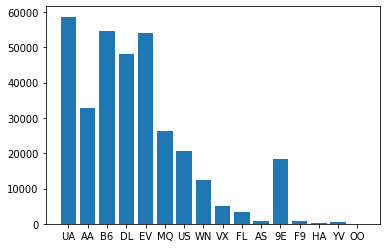

In [3]:
def numberofflights(k):
    return len(a[a.carrier==b[k]])
flights=[numberofflights(k) for k in range(len(b))]
plt.bar(b,flights)
for i in range(len(b)):
    print(b[i],flights[i])

Теперь посмотрим количество задержек у каждой компании

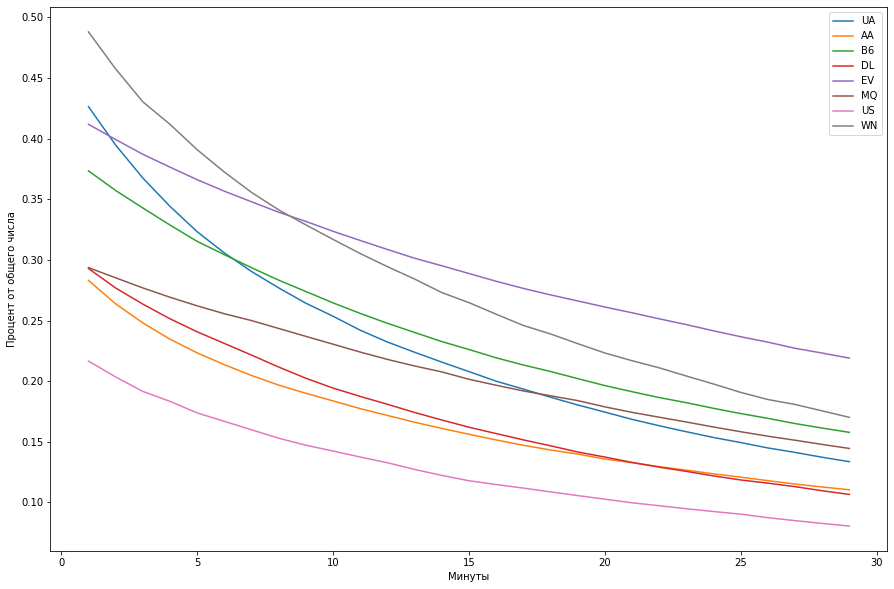

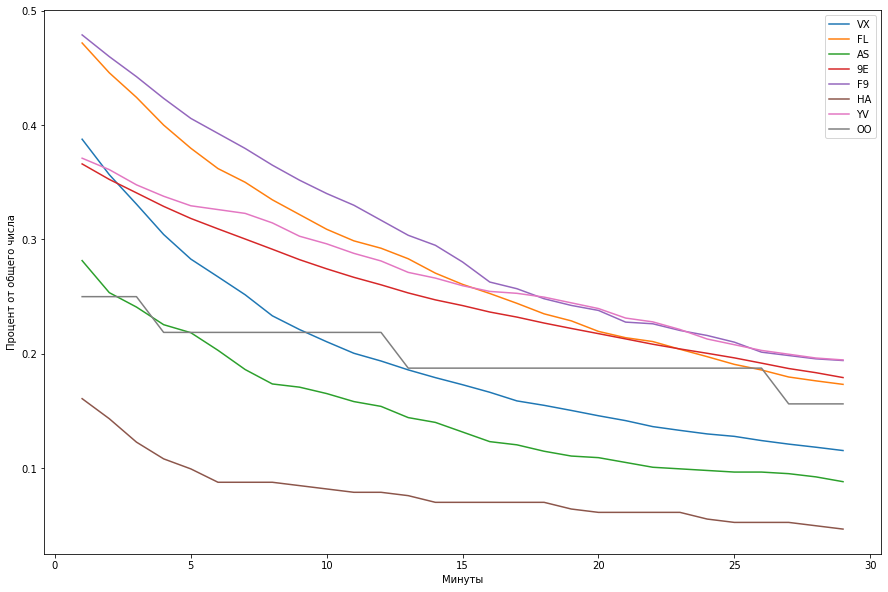

In [5]:
def delaymorethen(i,j):
    return (len(a[(a.carrier==b[j])&(a.dep_delay>i)]) / len(a[a.carrier==b[j]]))
def delay(j):
    return [delaymorethen(k,j) for k in range(1,30)]
plt.figure(figsize=(15,10))
for j in range(0,8):
    plt.plot(range(1,30),delay(j),label=b[j])
plt.legend()
plt.xlabel('Минуты')
plt.ylabel('Процент от общего числа')
plt.show()
plt.figure(figsize=(15,10))
for j in range(8,16):
    plt.plot(range(1,30),delay(j),label=b[j])
plt.legend()
plt.xlabel('Минуты')
plt.ylabel('Процент от общего числа')
plt.show()

Видно, что US из крупных перевозчиков лучше других справляется c задержками, также интересно то, что примерно все задержки убывают по одному закону.

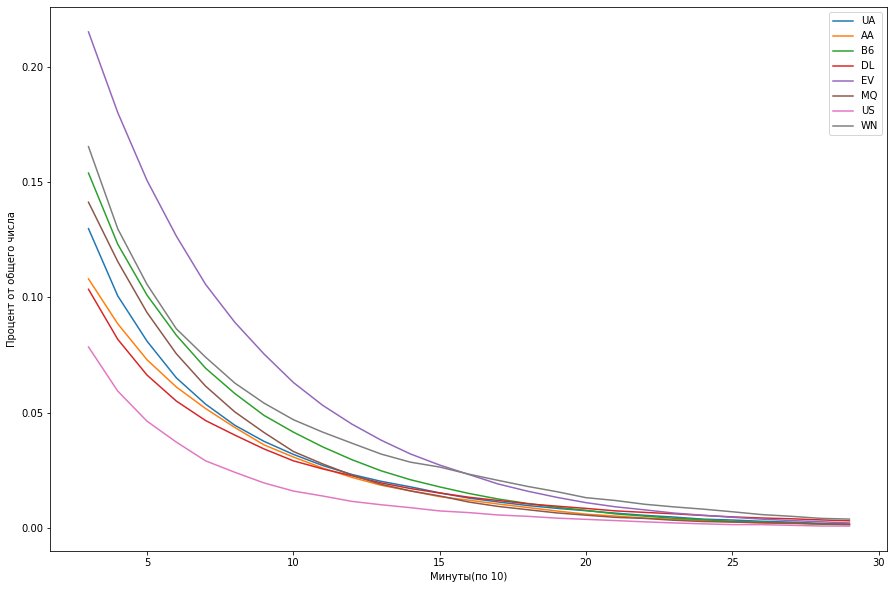

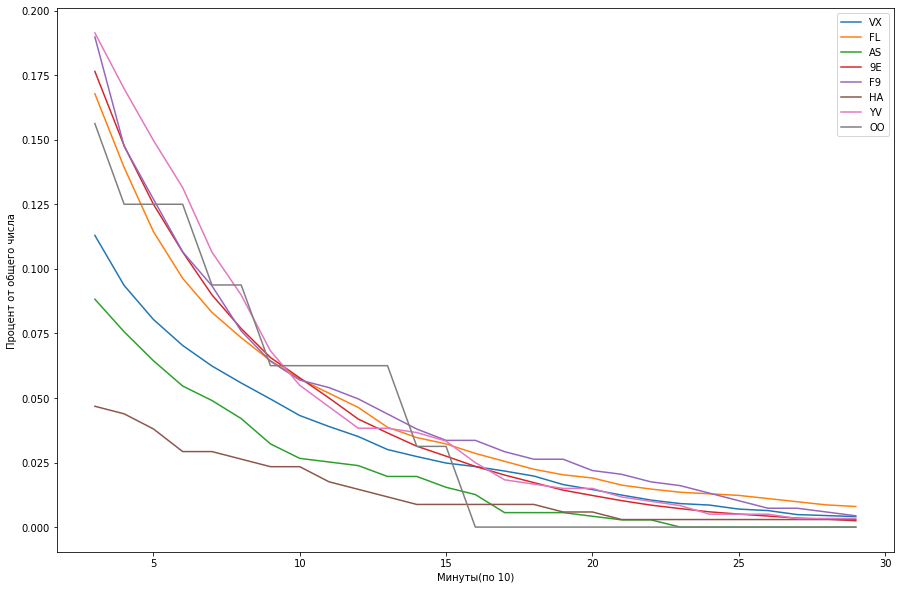

In [6]:
def delaymorethen(i,j):
    return (len(a[(a.carrier==b[j])&(a.dep_delay>i*10)]) / len(a[a.carrier==b[j]]))
def delay(j):
    return [delaymorethen(k,j) for k in range(3,30)]
plt.figure(figsize=(15,10))
for j in range(0,8):
    plt.plot(range(3,30),delay(j),label=b[j])
plt.legend()
plt.xlabel('Минуты(по 10)')
plt.ylabel('Процент от общего числа')
plt.show()
plt.figure(figsize=(15,10))
for j in range(8,16):
    plt.plot(range(3,30),delay(j),label=b[j])
plt.legend()
plt.xlabel('Минуты(по 10)')
plt.ylabel('Процент от общего числа')
plt.show()

провалов (задержка очень большая, на графике вплоть до 6 часов) примерно у всех одинаково. Хотя US прилично лидирует. Вывод US самый надёжный

Теперь посмотрим сколько в среднем происходит задержек ежемесячно

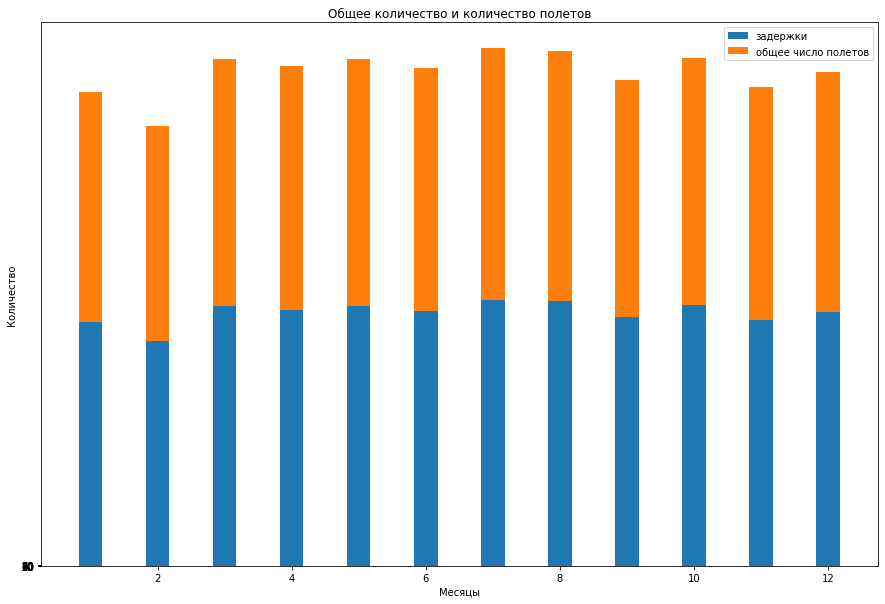

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def numberofflights(k):
    return len(a[(a.dep_delay!=0)&(a.month==k)])
N = 13
allnumber=[a.year[a.month==k].count() for k in range (1,13)]
flights=[numberofflights(k) for k in range(1,13)]
ind = np.arange(1,13)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(15,10))
p1 = plt.bar(ind,allnumber, width)
p2 = plt.bar(ind, flights, width,
             bottom=allnumber,)

plt.ylabel('Количество')
plt.title('Общее количество и количество полетов')
plt.xlabel('Месяцы')
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('задержки', 'общее число полетов'))

plt.show()

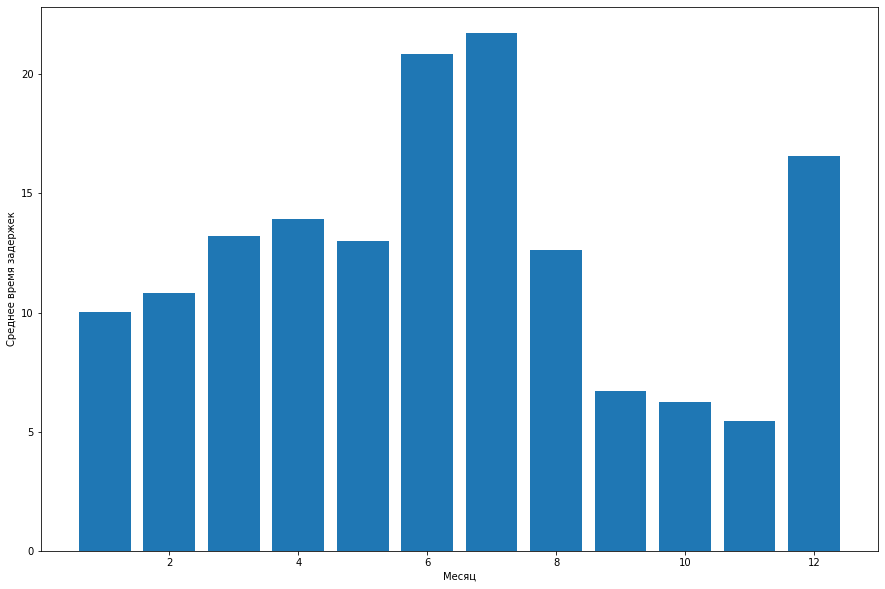

In [8]:
def numberofflights(k):
    return len(a[(a.dep_delay!=0)&(a.month==k)])
allnumber=[a.year[a.month==k].count() for k in range (1,13)]
means=[a.dep_delay[a.month==k].mean() for k in range (1,13)]
flights=[numberofflights(k) for k in range(1,13)]
b=np.arange(1,13)
plt.figure(figsize=(15,10))
plt.bar(b,means)
plt.xlabel('Месяц')
plt.ylabel('Среднее время задержек')
plt.show()

Видно, что в летние месяцы чуть побольше задержек (но правда и соотношение рейсов такое же). Вывод: надо посмотреть среднее время задержки по месяцам

На второй диаграмме видно, что в летние месяцы средняя задержка выше, больше 20 минут! Также высокая она в декабре. Это

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
import pandas as pd
weather=pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')

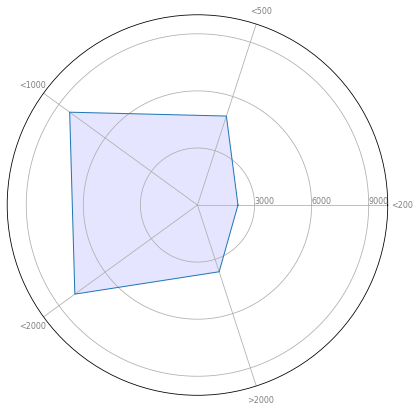

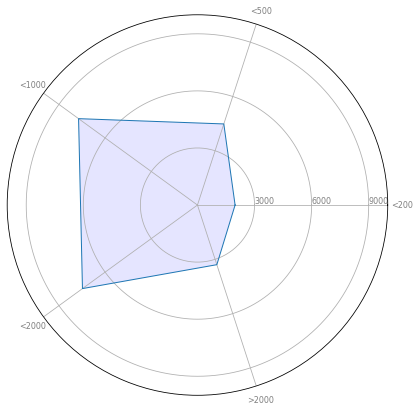

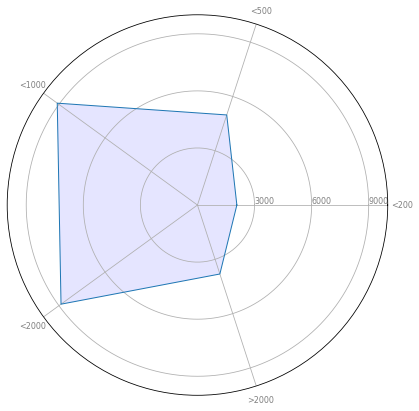

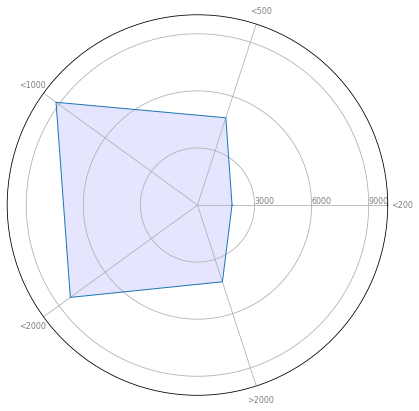

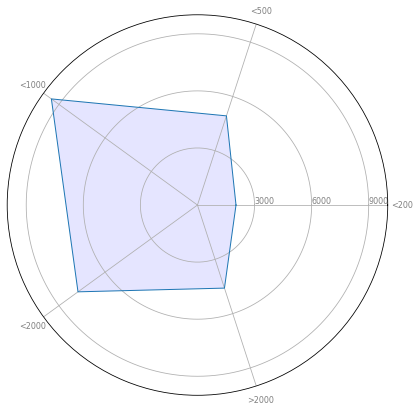

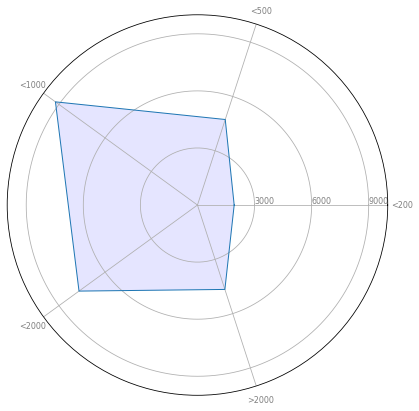

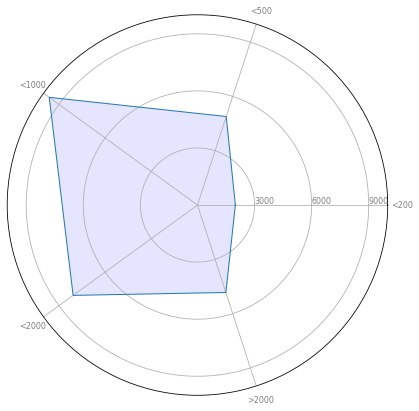

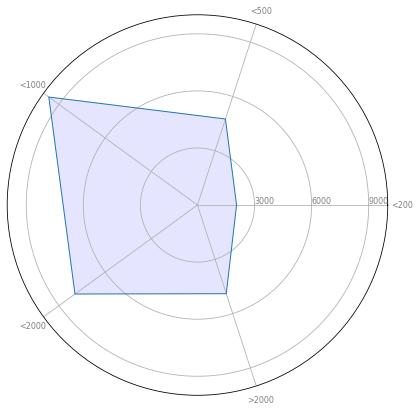

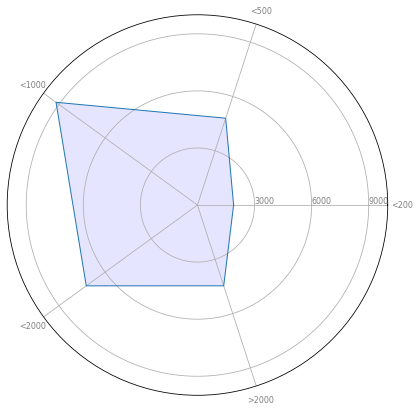

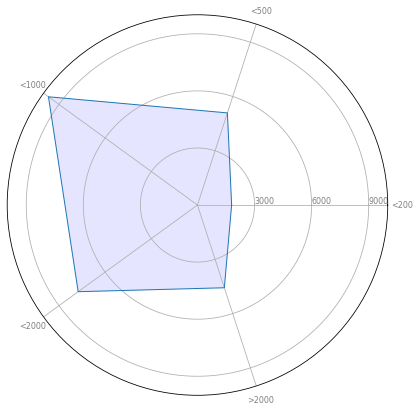

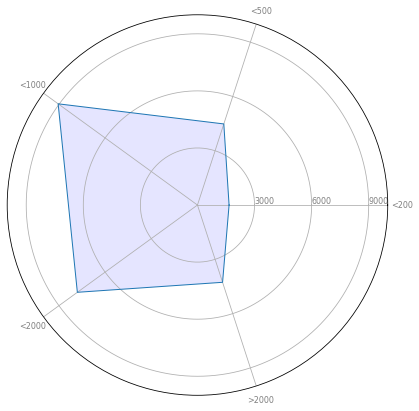

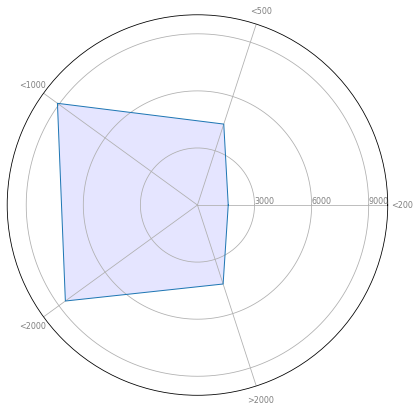

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

df = pd.DataFrame({
'group': [1,2,3,4,5,6,7,8,9,10,11,12],
'<200': [a.year[(a.distance<=200)&(a.month==k)].count() for k in range (1,13)],
'<500': [a.year[(a.distance<=500)&(a.distance>200)&(a.month==k)].count() for k in range (1,13)],
'<1000': [a.year[(a.distance<=1000)&(a.distance>500)&(a.month==k)].count()for k in range (1,13)],
'<2000': [a.year[(a.distance<=2000)&(a.distance>1000)&(a.month==k)].count() for k in range (1,13)],
'>2000': [a.year[(a.distance>2000)&(a.month==k)].count() for k in range (1,13)]
})
categories=list(df)[1:]
N = len(categories)
for i in range (12):
    plt.figure(figsize=(10,7))
    plt.subplot(4,3,i+1)
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    values
 
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    ax = plt.subplot(111, polar=True)
 
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 

    ax.set_rlabel_position(0)
    plt.yticks([3000,6000,9000], ["3000","6000","9000"], color="grey", size=8)
    plt.ylim(0,10000)
 
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.show()
 

здесь изображены радарные диаграммы дальности полетов каждый месяц в течение года. Видно, что это не зависит отвремени года, что достаточно странно. Поэтому проведем то же для авикомпаний

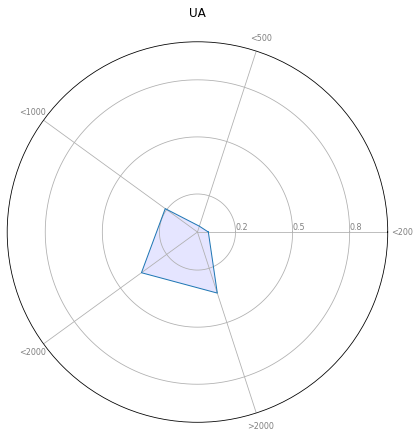

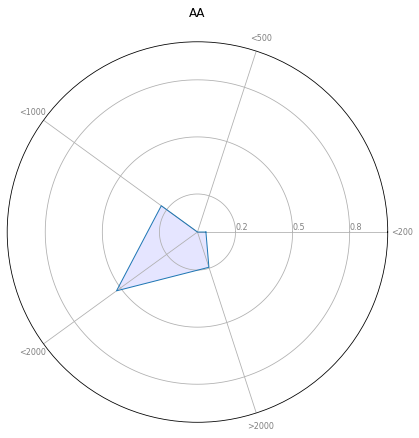

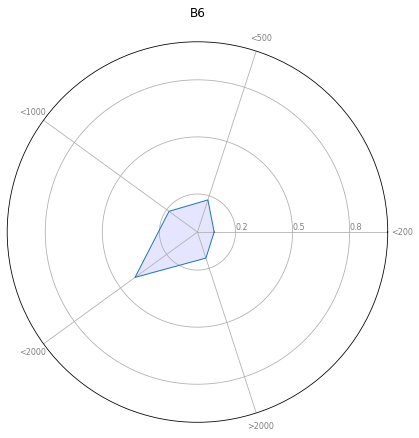

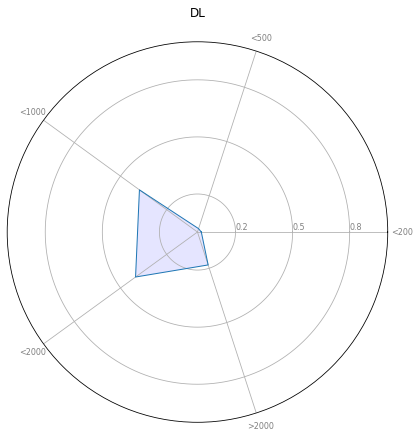

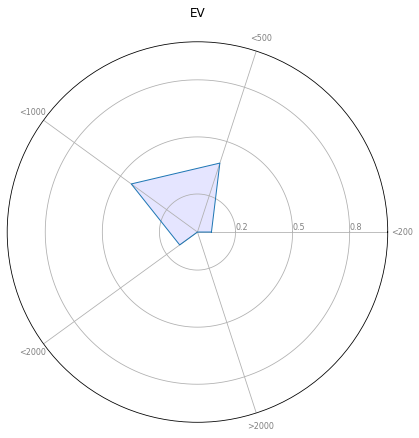

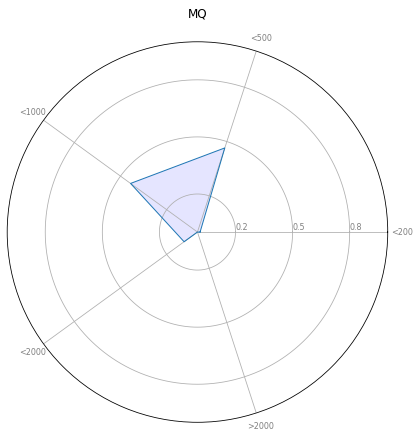

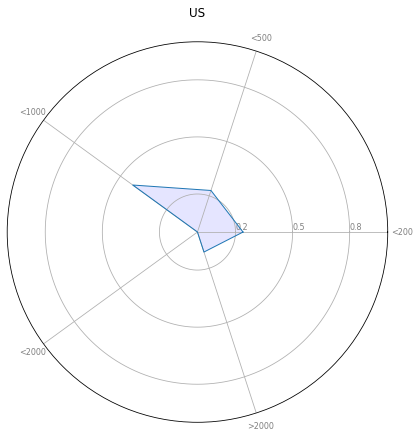

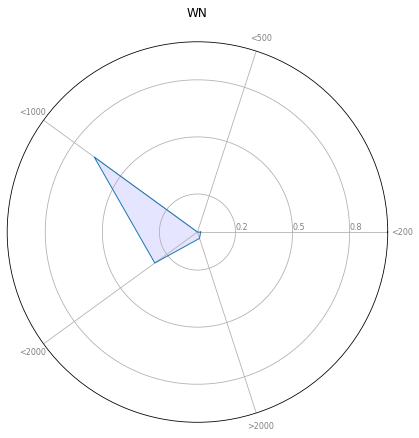

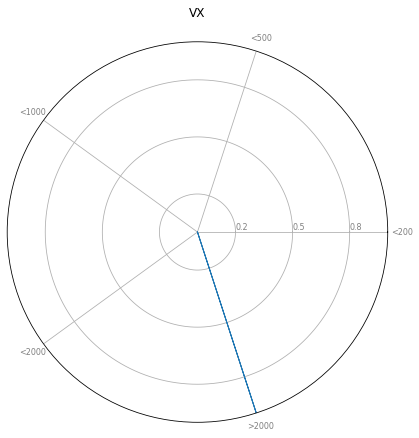

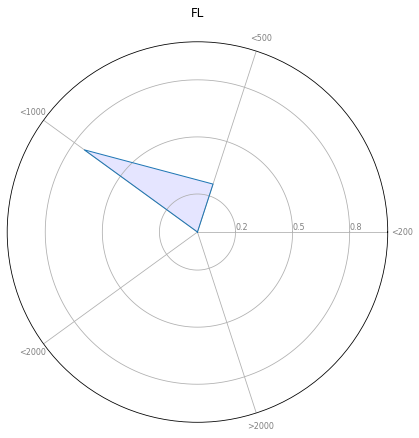

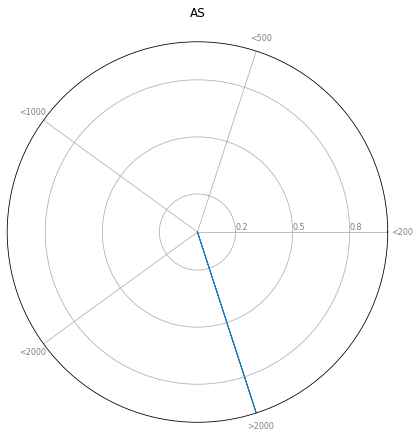

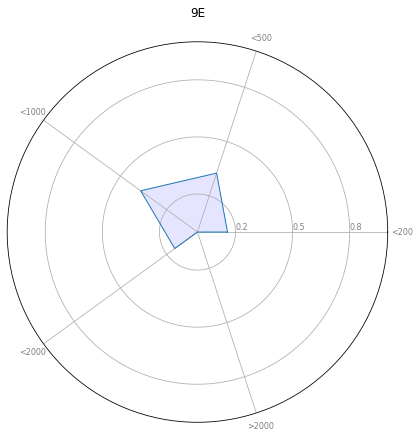

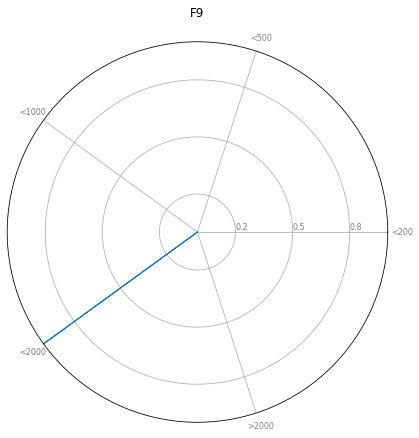

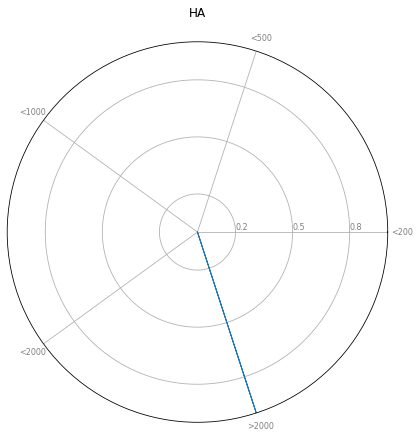

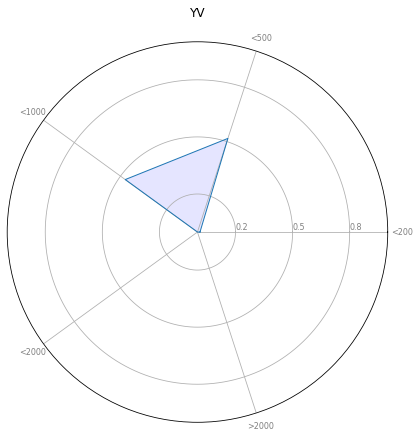

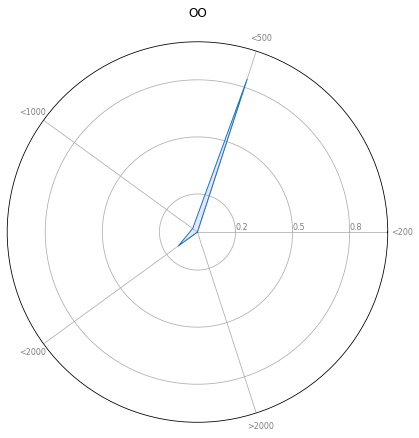

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
b=a.carrier.unique()
df = pd.DataFrame({
'group': b,
'<200': [a.year[(a.distance<=200)&(a.carrier==b[k])].count() / a.year[(a.carrier==b[k])].count() for k in range (len(b))],
'<500': [a.year[(a.distance<=500)&(a.distance>200)&(a.carrier==b[k])].count() / a.year[(a.carrier==b[k])].count() for k in range (len(b))],
'<1000': [a.year[(a.distance<=1000)&(a.distance>500)&(a.carrier==b[k])].count() / a.year[(a.carrier==b[k])].count() for k in range (len(b))],
'<2000': [a.year[(a.distance<=2000)&(a.distance>1000)&(a.carrier==b[k])].count() / a.year[(a.carrier==b[k])].count()for k in range (len(b))],
'>2000': [a.year[(a.distance>2000)&(a.carrier==b[k])].count() / a.year[(a.carrier==b[k])].count()for k in range (len(b))]
})
categories=list(df)[1:]
N = len(categories)
for i in range (16):
    plt.figure(figsize=(10,7))
    plt.subplot(4,4,i+1)
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    values
 
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    ax = plt.subplot(111, polar=True)
 
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 

    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.5,0.8], ["0.2","0.5","0.8"], color="grey", size=8)
    plt.ylim(0,1)
    plt.title(b[i])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.show()

Вот уже наглядно, сразу видно, какие авикомпании возят недалеко, а также, на чем специализируются малые авикомпании

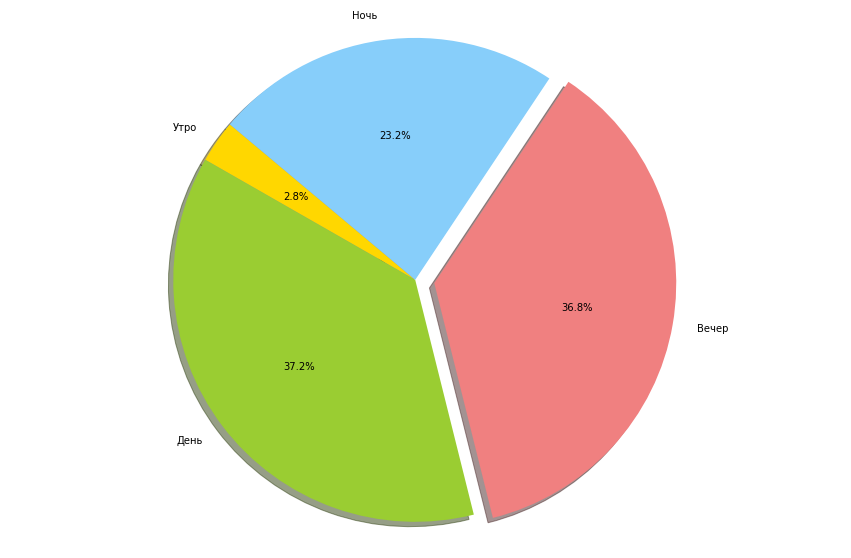

In [56]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Утро', 'День', 'Вечер', 'Ночь'
sizes = [a.year[(a.dep_time<=(k+1)*600)&(a.dep_time>k*600)].count()for k in range(4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.08, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Здесь нагядно представлено распределения отправлений по временам суток.

Ну и последнее, посмотрим зависимость задержек от ветра.

In [54]:
windmean=weather.wind_speed.mean()
print(windmean)

9.335732450103894


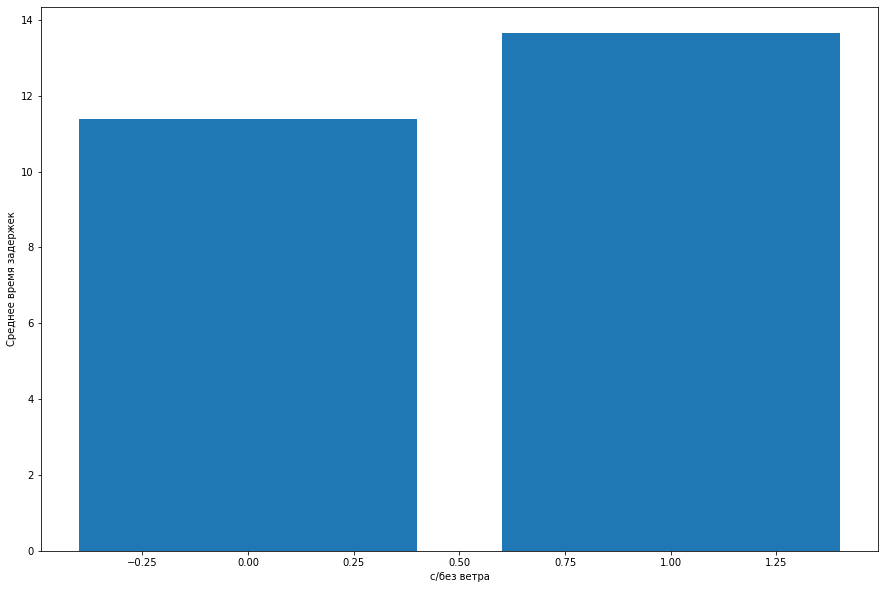

In [106]:
c=np.array([31,28,31,30,31,30,31,31,30,31,30,31])
counter=0
wind1=np.zeros(365)
means=np.zeros(365)
for k in range (1,13):
    for l in range (1,c[k-1]+1):
          #print(len(weather.day[(weather.month==k)&(weather.hour==0)]))
            wind1[counter]=weather.wind_speed[(weather.month==k)&(weather.hour==0)&(weather.day==l)].mean()
            means[counter]=a.dep_delay[(a.month==k)&(a.day==l)].mean()
            counter=counter+1
t=0
p=0
l=0
q=0
for i in range(365):
    if wind1[i]>windmean:
        t=t+1
        l=l+means[i]
    else:
        p=p+1
        q=q+means[i]
l=l/t
q=q/p
answer=[l,q]
b=np.arange(2)
plt.figure(figsize=(15,10))
plt.bar(b,answer)
plt.xlabel('с/без ветра')
plt.ylabel('Среднее время задержек')
plt.show()
    

то есть с ветром задержек меньше, удивительно!!!!